# US CRIME - Effect of Punishment Regimes on Crime Rates

Author: **Artur Chiaperini Grover**   
**Company**'s entrance exam      

-------   

In this exercise, I will create a regression model in order to find out what is the crime rate, denoted by variable `Crime`, for the following point (where variables assume the values):
- `M = 14.0`
- `So = 0`
- `Ed = 10.0`
- `Po1 = 12.0`
- `Po2 = 15.5`
- `LF = 0.640`
- `M.F = 94`
- `Pop = 150`
- `NW = 1.1`
- `U1 = 0.120`
- `U2 = 3.6`
- `Wealth = 3200`
- `Ineq = 20.1`
- `Prop = 0.04`
- `Time = 39.0` 
- `Crime = ???` 

-------    

# Data Description

The dataset can be found in [here](http://www.statsci.org/data/general/uscrime.html), and the information below was extracted from it.

>In order to investigate the effect of punishment regimes on crime rates, criminologists used the aggregated data of 47 states of the USA for 1960. The variables considered in this study are the following:   
>
>| Variable | Description |
>|:---------|:------------|
>| M		| percentage of males aged 14–24 in total state population |
>| So	    | indicator variable for a southern state |
>| Ed	    | mean years of schooling of the population aged 25 years or over |
>| Po1	    | per capita expenditure on police protection in 1960 |
>| Po2	    | per capita expenditure on police protection in 1959 |
>| LF	    | labour force participation rate of civilian urban males in the age-group 14-24 |
>| M.F	    | number of males per 100 females |
>| Pop	    | state population in 1960 in hundred thousands |
>| NW	    | percentage of nonwhites in the population |
>| U1       | unemployment rate of urban males 14–24 |
>| U2	    | unemployment rate of urban males 35–39 |
>| Wealth   | wealth: median value of transferable assets or family income |
>| Ineq	    | income inequality: percentage of families earning below half the median income |
>| Prob	    | probability of imprisonment: ratio of number of commitments to number of offenses |
>| Time	    | average time in months served by offenders in state prisons before their first release |
>| Crime	| crime rate: number of offenses per 100,000 population in 1960 |   

# Data Exploration

Our goal is to model the experiment based on the dataset in order to determine the crime rate for the variables values given above. We can see the `Crime` (crime rate) as a function of the other variables, for instance:
$$
\begin{equation}
    f(\mathbf{X}) = \mathbf{A} * \mathbf{X}, 
\end{equation}
$$
where $f(\mathbf{X}) = $ `Crime`, $\mathbf{X} = $ `(M, So, Ed, Po1, Po2, LF, M.F, Pop, NW, U1, U2, Wealth, Ineq, Prob, Time)`, and $\mathbf{A}$ are the parameters of the model. At this point this is just one idea to illustrate the the problem, as a linear case, which in the future may turn out to be not the reality.  

Below we load the dataset and assign it to a pandas DataFrame object `df_crimes`, this allow us to have an initial look at our dataset.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_crimes = pd.read_csv("../dataset/uscrime.txt", sep="\t")

In [3]:
df_crimes.head(5)

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
0,15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
1,14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
2,14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
3,13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
4,14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234


In [4]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       47 non-null     float64
 1   So      47 non-null     int64  
 2   Ed      47 non-null     float64
 3   Po1     47 non-null     float64
 4   Po2     47 non-null     float64
 5   LF      47 non-null     float64
 6   M.F     47 non-null     float64
 7   Pop     47 non-null     int64  
 8   NW      47 non-null     float64
 9   U1      47 non-null     float64
 10  U2      47 non-null     float64
 11  Wealth  47 non-null     int64  
 12  Ineq    47 non-null     float64
 13  Prob    47 non-null     float64
 14  Time    47 non-null     float64
 15  Crime   47 non-null     int64  
dtypes: float64(12), int64(4)
memory usage: 5.9 KB


Our data has no missing values, this information is shown by `df_crimes.info()` method. We can also see that most of the variables are numerical. However, according to the data description, `So` is an indicator variable which I believe is more reasonable to be used as a categorical variable, this will be addressed later.

In [5]:
df_crimes.describe()

,M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
count,47.000000,47.000000,47.00000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,13.857447,0.340426,10.56383,8.500000,8.023404,0.561191,98.302128,36.617021,10.112766,0.095468,3.397872,5253.829787,19.400000,0.047091,26.597921,905.085106
std,1.256763,0.478975,1.11870,2.971897,2.796132,0.040412,2.946737,38.071188,10.282882,0.018029,0.844545,964.909442,3.989606,0.022737,7.086895,386.762697
min,11.900000,0.000000,8.70000,4.500000,4.100000,0.480000,93.400000,3.000000,0.200000,0.070000,2.000000,2880.000000,12.600000,0.006900,12.199600,342.000000
25%,13.000000,0.000000,9.75000,6.250000,5.850000,0.530500,96.450000,10.000000,2.400000,0.080500,2.750000,4595.000000,16.550000,0.032701,21.600350,658.500000
50%,13.600000,0.000000,10.80000,7.800000,7.300000,0.560000,97.700000,25.000000,7.600000,0.092000,3.400000,5370.000000,17.600000,0.042100,25.800600,831.000000
75%,14.600000,1.000000,11.45000,10.450000,9.700000,0.593000,99.200000,41.500000,13.250000,0.104000,3.850000,5915.000000,22.750000,0.054450,30.450750,1057.500000
max,17.700000,1.000000,12.20000,16.600000,15.700000,0.641000,107.100000,168.000000,42.300000,0.142000,5.800000,6890.000000,27.600000,0.119804,44.000400,1993.000000


Then, another useful method of `df_crimes` object is `.describe()` which summarises the variables and we can start to see the minimum and maximum of the dataset, as well as the mean values of each varible.  

We can see that the total count holds for every variable as was shown by `.info()` method, and we also see that all of the variables are positive. Given the kind of study these variables relate to, the fact that all of them are positive is rather expected. These variables, according to the description, are porcentages, counts, and averages of positive or null numbers, thus we would not expect to find a negative number.   

In this problem we can initially think that we have 15 independent variables `(M, So, Ed, Po1, Po2, LF, M.F, Pop, NW, U1, U2, Wealth, Ineq, Prob, Time)`, and then a dependent variable `Crime`.

The heatmap is a good visualization to look for correlation between variables and with the dependent variable. In case we have high correlation between variables, we can think of applying some kind of dimensionality reduction, or even eliminating one of the variables if the correlation is too strong.

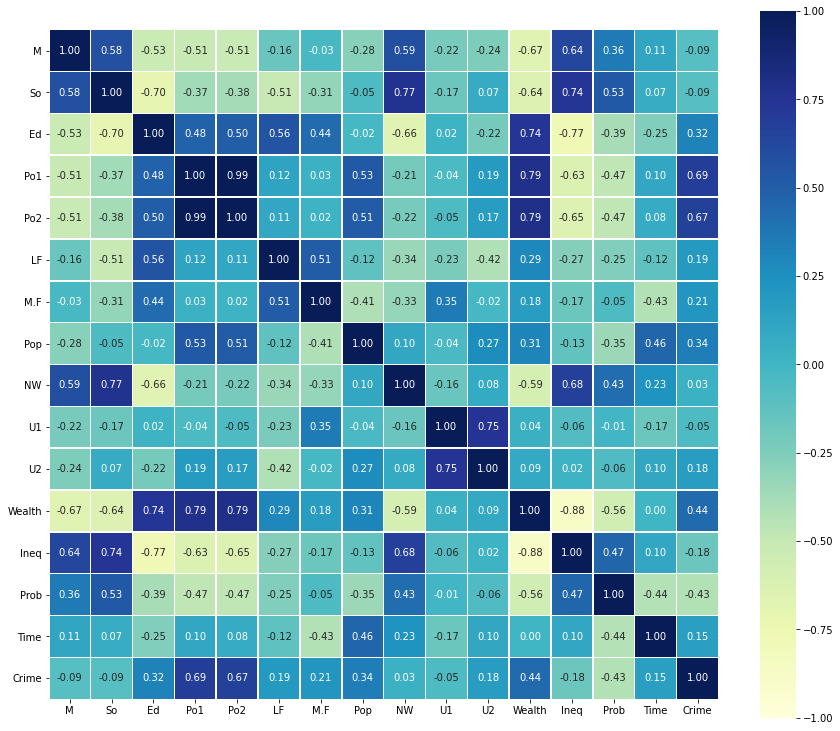

In [6]:
fig, ax = plt.subplots(figsize=(15,13))

corr_crimes = df_crimes.corr()

sns.heatmap(corr_crimes, vmin=-1.0, vmax=1.0, center=0.0, fmt='.2f',
                square=True, linewidths=0.5, annot=True, cmap='YlGnBu')

plt.yticks(rotation=0)
plt.show()

The heatmap above shows the pearson correlation between variables, which varies from -1.0 (negative correlation) to 1.0 (positive correlation):
- Negative Correlation: variables behave in the opposite direction, while variable A is increasing, variable B is decreasing.
- Positive Correlation: both variables A and B behave in the same direction, such that when A increases, B increases as well.
- No Correlation (values close to 0.0): there is no relationship between the variables A and B.   

We can see that some variables have a strong positive correlation between each other, below is an enumeration of set of variables that present some significant correlation value:
- `Po1` and `Po2` have positive correlation of 0.99.
- `Wealth` and `Ed`, `Wealth` and `Po1`, `Wealth` and `Po2` have positive correlations, respectively, 0.74, 0.79, 0.79.
- `NW` and `So` have a correlation above 0.7.
- `Ineq` and `Ed` have a negative correlation of -0.77. 
